In [1]:
import sympy
import numpy as np
from sympy import Eq, plot_implicit, Matrix, plot, symbols, latex, S
from sympy.core import sympify
from sympy.geometry.point import Point, Point2D, Point3D
from sympy.geometry.line import Line
from sympy.core.symbol import _symbol
from sympy import pi as Pi
from sympy import cos as Cos
from sympy import sin as Sin
from sympy.geometry.entity import GeometryEntity, GeometrySet
import matplotlib.pyplot as plt
from IPython.display import Latex
from dataclasses import dataclass, field

# Практическое занятие 16
# Компьютерный практикум по алгебре на Python
## Кривые второго порядка на плоскости: парабола

### Задание 1
Определить класс Parabola.

Внутренние переменные $\_p$, $\_vertex$, $\_angle$.

Реализовать **атрибуты**:

**параметр** $p$

**вершина** (vertex) в виде точки Point

**фокус** (focus) в виде точки Point

**угол angle** по умолчанию 0 для параболы с осью, параллельной OX, и ветвями, направленными вправо

**ось симметрии** (axis_symmetry) в виде прямой Line

**директриса** (directrix) в виде прямой Line

Реализовать **методы**

**equation(self)** - уравнение параболы,

**dir_equation(self)** - уравнение директрисы,

**ax_sym_equation(self**) - уравнение оси симметрии,

**rotate(self, angle)** - поворот на угол angle против часовой стрелки, метод не изменяет параболу, а возвращает параболу с теми же p и вершиной, но угол увеличен на angle по сравнению с исходной параболой.

В конструкторе экземпляра класса  

\_\_new\_\_(cls, p, vertex=None, angle=None)

p - обязательный параметр, а вид параболы по умолчанию  - парабола с осью, параллельной оси OX,
вершина по умолчанию в начале координат.

In [2]:
from sympy.abc import x, y
class Parabola(GeometryEntity):

    def __new__(cls, p, vertex=None, angle=None, **kwargs):
        if vertex is None:
            vertex = Point(0, 0)
        else:
            if len(vertex) != 2:
                raise ValueError('The vertex of "{}" must be a two dimensional point'.format(cls))
            vertex = Point(vertex, dim=2)
        if angle is None:
            angle = 0
        return super().__new__(cls, p, vertex, angle, **kwargs)


    def __init__(self, p, vertex=None, angle=None, **kwargs):
        if vertex is None:
            vertex = Point(0, 0)
        else:
            if len(vertex) != 2:
                raise ValueError('The vertex must be a two dimensional point')
            vertex = Point(vertex, dim=2)
        if angle is None:
            angle = 0
        self._p = p
        self._vertex = vertex
        self._angle = angle
        self._A = Matrix([[Cos(angle), Sin(angle)],
                  [-Sin(angle), Cos(angle)]])
        self._A1 = Matrix([[Cos(angle), -Sin(angle)],
                  [Sin(angle), Cos(angle)]])


    @property
    def p(self):
        return self._p

    @property
    def vertex(self) -> Point:
        return self._vertex

    @property
    def angle(self):
        return self._angle

    @property
    def focus(self) -> Point:
        return Point(self.vertex.x + self.p * Cos(self.angle) / 2, self.vertex.y + self.p * Sin(self.angle) / 2)

    @property
    def focus1(self) -> Point:
        return Point(self.vertex.x - self.p * Sin(self.angle) / 2, self.vertex.y + self.p * Cos(self.angle) / 2)

    @property
    def axis_symmetry(self) -> Line:
        return Line(self._vertex, self.focus)

    @property
    def axis_symmetry1(self) -> Line:
        return Line(self._vertex, self.focus1)


    @property
    def directrix(self) -> Line:
        P = Point(self.vertex.x - self.p * Cos(self.angle) / 2, self.vertex.y - self.p * Sin(self.angle) / 2)
        return self.axis_symmetry.perpendicular_line(P)

    @property
    def directrix1(self) -> Line:
        P = Point(self.vertex.x + self.p * Sin(self.angle) / 2, self.vertex.y - self.p * Cos(self.angle) / 2)
        return self.axis_symmetry1.perpendicular_line(P)

    def equation(self) -> Eq:
        x, y = symbols('x y')
        X = self._A * Matrix((x - self._vertex.x, y - self._vertex.y))
        return Eq((X[1]) ** 2, 2 * self._p * (X[0]))

    def equation1(self) -> Eq:
        x, y = symbols('x y')
        X = self._A * Matrix((x - self._vertex.x, y - self._vertex.y))
        return Eq((X[0]) ** 2, 2 * self._p * (X[1]))

    def dir_equation(self) -> Eq:
        return Eq(self.directrix.equation(), 0)

    def dir_equation1(self) -> Eq:
        return Eq(self.directrix1.equation(), 0)


    def ax_sym_equation(self) -> Eq:
        return Eq(self.axis_symmetry.equation(), 0)

    def ax_sym_equation1(self) -> Eq:
        return Eq(self.axis_symmetry1.equation(), 0)

    def rotate(self, angle):
        return Parabola(self.p, self.vertex, self.angle + angle)


### Задание 2
Построить параболу с $p = 3$, вершиной в (-5, 2), осью симметрии, образующей угол $\pi/4$ с положительным направлением оси ОХ. Вывести на экран ее параметр p, вершину, угол, фокус, ось симметрии и директрису, а также уравнение параболы, оси симметрии и директрисы.

Изобразить на общем графике параболу, ее ось симметрии и директрису, парабола зеленая, ось симметрии красная, директриса черная.

'p'

3

'Вершина'

Point2D(-5, 2)

'Фокус'

Point2D(-5 + 3*sqrt(2)/4, 3*sqrt(2)/4 + 2)

'Угол'

pi/4

'Парабола'

Eq(3*sqrt(2)*(x + y + 3), (x - y + 7)**2/2)

'Директриса'

Eq(x + y, 2*sqrt(2)*(-9*sqrt(2)/4 - 9/4)/3)

'Ось симметрии'

Eq(x - y, -7)

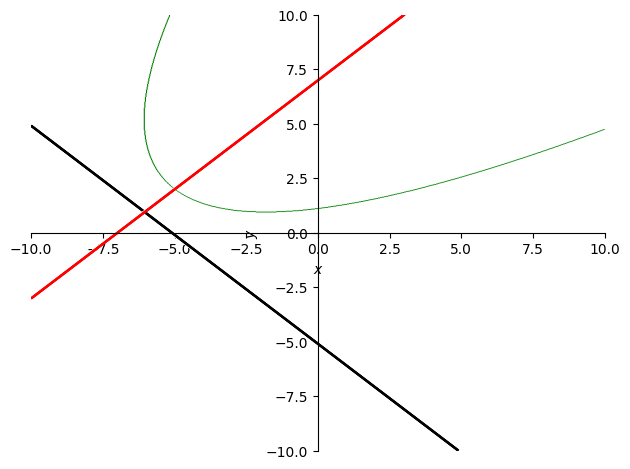

In [6]:
from sympy.abc import x, y
a = Parabola(3, (-5, 2), Pi/4)


display('p', a.p)
display('Вершина', a.vertex)
display('Фокус', a.focus)
display('Угол', a.angle)


equ = a.equation().simplify()
equ1 = a.dir_equation().simplify()
equ2 = a.ax_sym_equation().simplify()


display('Парабола', equ)
display('Директриса', equ1)
display('Ось симметрии', equ2)

y1, x1 = equ.free_symbols
y2, x2 = equ1.free_symbols
y3, x3 = equ2.free_symbols

p = plot_implicit(equ.subs(x1, x).subs(y1, y), (x, -10, 10), (y, -10, 10), line_color='green', show=False)
p.extend(plot_implicit(equ1.subs(x2, x).subs(y2, y), (x, -10, 10), (y, -10, 10), line_color='black', show=False, adaptive=False))
p.extend(plot_implicit(equ2.subs(x3, x).subs(y3, y), (x, -10, 10), (y, -10, 10), line_color='red', show=False, adaptive=False))

p.show()


### Индивидуальное задание
Построить параболу $x^{2} = 2py$ с $p = 5$, построить другую параболу путем поворота исходной параболы  на угол $\alpha = \pi/5$ радиан. Вывести на экран вершину, угол, фокус, ось симметрии и директрису обеих парабол.

Использовать уравнения повернутой параболы, ее оси симметрии и директрисы для построения графиков в одной координатной плоскости. Парабола фиолетовая, ось симметрии зеленая, директриса черная, название графика Парабола, подписи осей $x$ и $y$.

'p'

2

'Вершина'

Point2D(1, -2)

'Фокус'

Point2D(1/2, -2 - sqrt(3)/2)

'Угол'

5*pi/6

'Парабола'

Eq(2*x + 2*sqrt(3)*(y + 2) - 2, -(y - sqrt(3)*(x - 1) + 2)**2/4)

'Директриса'

Eq(x/2 + sqrt(3)*y/2, 3/2 - sqrt(3))

'Ось симметрии'

Eq(sqrt(3)*x/2 - y/2, sqrt(3)/2 + 1)

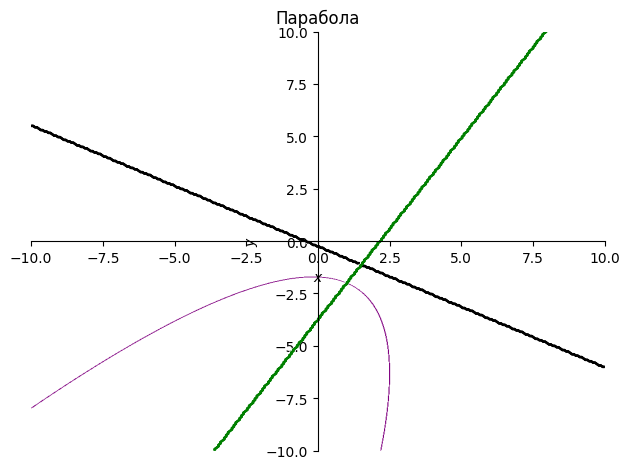

In [9]:
# Вариант 21
#Центр Point(1, -2), парабола вида x^2 = 2py с p = 2. Угол поворота 5Pi/6
from sympy.abc import x, y
a = Parabola(2, (1, -2), 5*Pi/6)
display('p', a.p)
display('Вершина', a.vertex)
display('Фокус', a.focus1)
display('Угол', a.angle)

equ = a.equation1().simplify()
equ1 = a.dir_equation1().simplify()
equ2 = a.ax_sym_equation1().simplify()

display('Парабола', equ)
display('Директриса', equ1)
display('Ось симметрии', equ2)

y1, x1 = equ.free_symbols
y2, x2 = equ1.free_symbols
y3, x3 = equ2.free_symbols


p = plot_implicit(equ.subs(x1, x).subs(y1, y), (x, -10, 10), (y, -10, 10), title="Парабола", line_color='purple', show=False)
p.extend(plot_implicit(equ1.subs(x2, x).subs(y2, y), (x, -10, 10), (y, -10, 10), line_color='black', show=False, adaptive=False))
p.extend(plot_implicit(equ2.subs(x3, x).subs(y3, y), (x, -10, 10), (y, -10, 10), line_color='green', show=False, adaptive=False))

p.show()